In [5]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from ipywidgets import interact,fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


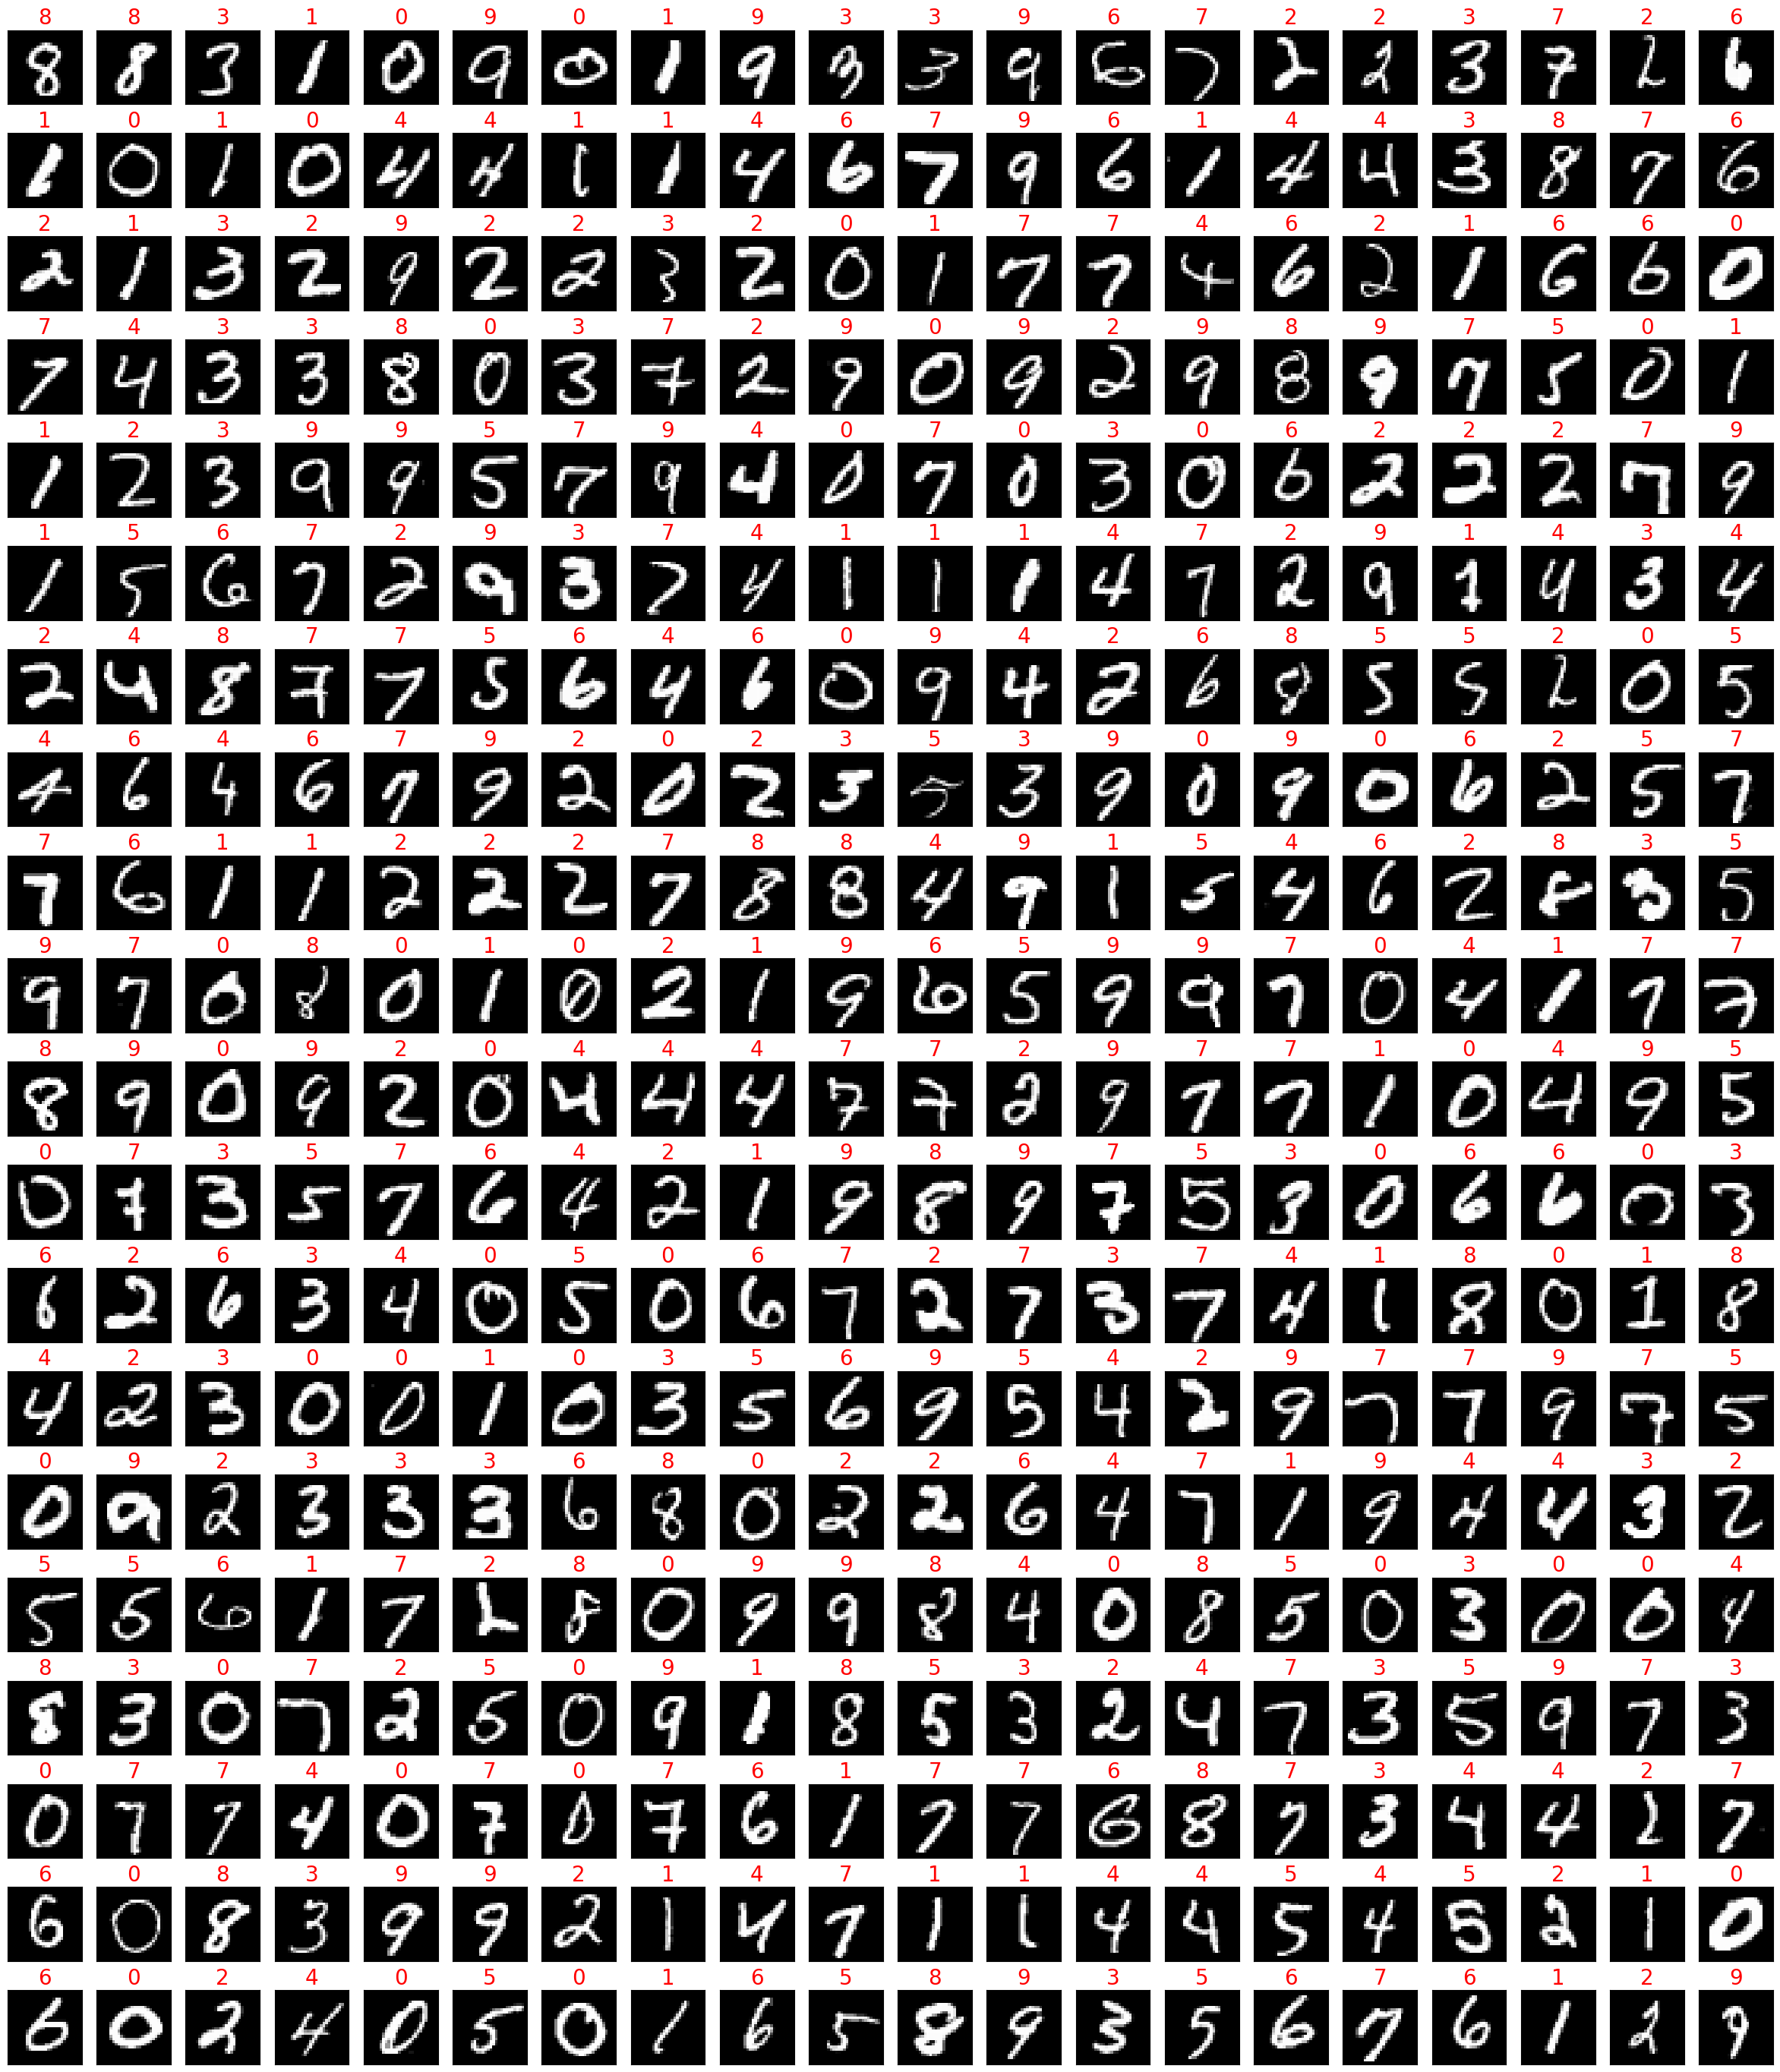

In [7]:
def show_images():
    array = np.random.randint(low=1, high=10000, size=400)
    fig = plt.figure(figsize=(30, 35))
    for i in range(400):
        fig.add_subplot(20, 20, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(y_train[array[i]], color='red', fontsize=20)
        plt.imshow(x_train[array[i]], cmap="gray")
show_images()

In [10]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

In [15]:
x_train_norm = x_train / 255.
x_test_norm = x_test / 255.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from keras.optimizers import SGD

model = Sequential([Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, 2),
                    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
                    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
                    MaxPooling2D(2, 2),
                    Flatten(),
                    Dense(100, activation='relu', kernel_initializer='he_uniform'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         102,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,654 (623.65 KB)

 Trainable params: 159,454 (622.87 KB)

 Non-trainable params: 200 (800.00 B)

In [18]:
x_train_norm = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))

from sklearn.model_selection import train_test_split as tts

x_val, x_test_, y_val, y_test_ = tts(x_test_norm, y_test_enc, test_size=0.5)

In [19]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test_.shape)
print(y_test_.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 10)
(5000, 28, 28, 1)
(5000, 10)


In [20]:
history = model.fit(x=x_train_norm, y=y_train_enc,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    epochs=15)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9201 - loss: 0.2736 - val_accuracy: 0.9778 - val_loss: 0.0676
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9856 - loss: 0.0494 - val_accuracy: 0.9844 - val_loss: 0.0467
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9902 - loss: 0.0321 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9931 - loss: 0.0234 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9916 - val_loss: 0.0257
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9973 - loss: 0.0103 - val_accuracy: 0.9896 - val_loss: 0.0301
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9983 - loss: 0.0075 - 

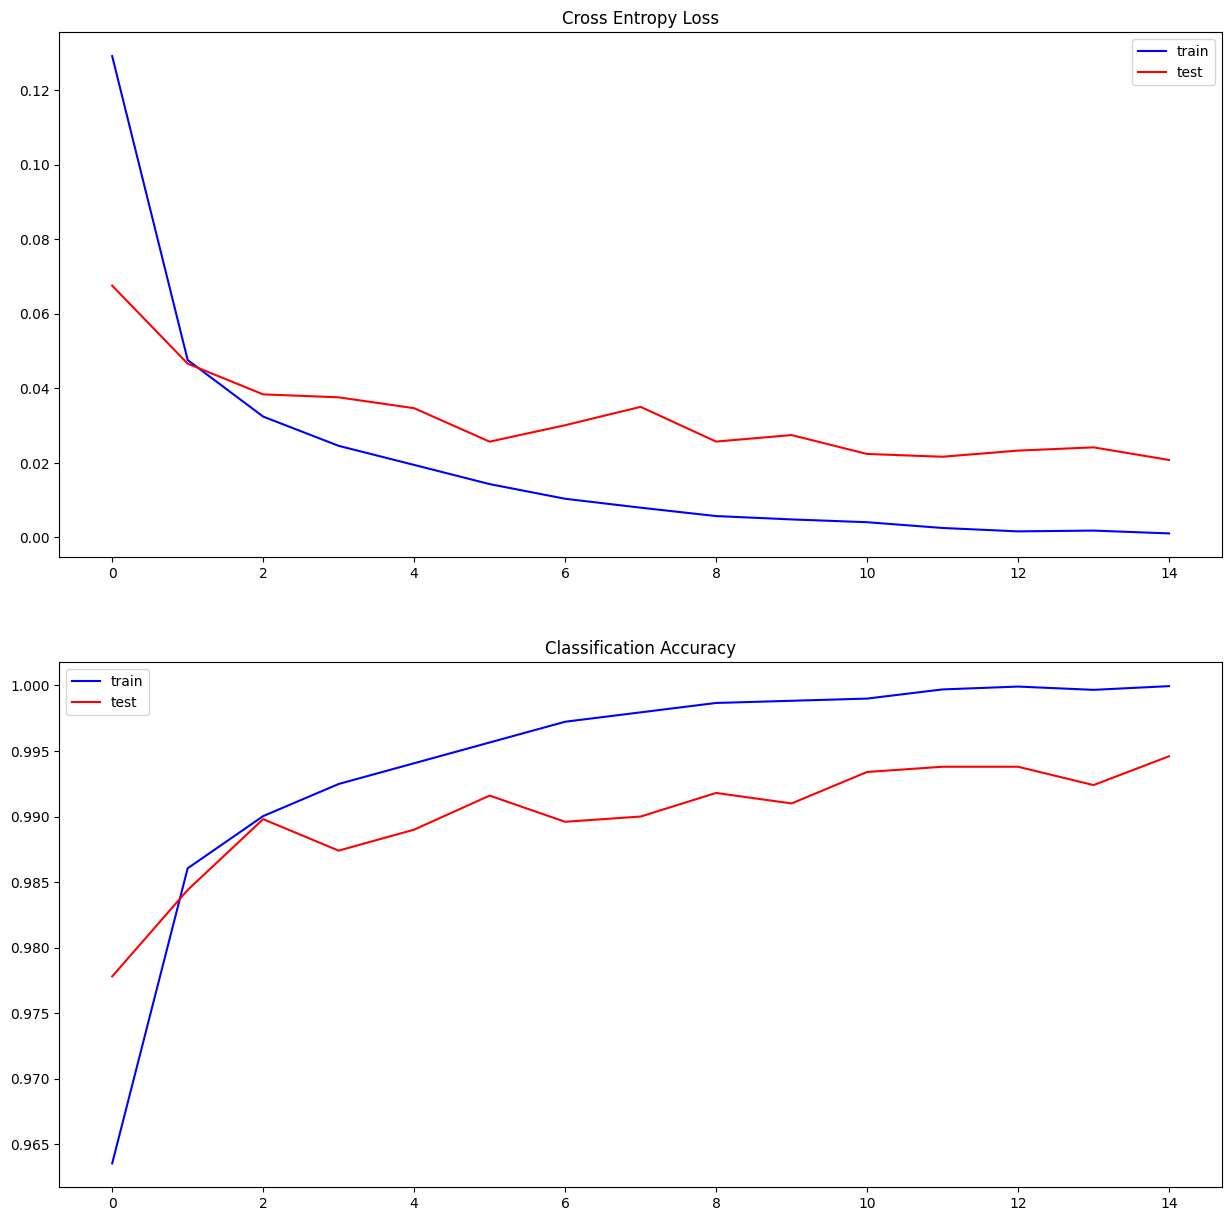

In [21]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
accuracy = history.history['accuracy']

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()

fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [24]:
metrics = model.evaluate(x_test_, y_test_)
print("Test Accuracy is : {:.2f}".format(metrics[1] * 100))
print("Test Loss is : {:.2f}".format(metrics[0]))

model.save('my_model.keras')

loaded_model = tf.keras.models.load_model('my_model.keras')

metrics = loaded_model.evaluate(x_test_, y_test_)
print("Test Accuracy is : {:.2f}".format(metrics[1] * 100))
print("Test Loss is : {:.2f}".format(metrics[0]))


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9923 - loss: 0.0205
Test Accuracy is : 99.10
Test Loss is : 0.02
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9923 - loss: 0.0205
Test Accuracy is : 99.10
Test Loss is : 0.02


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


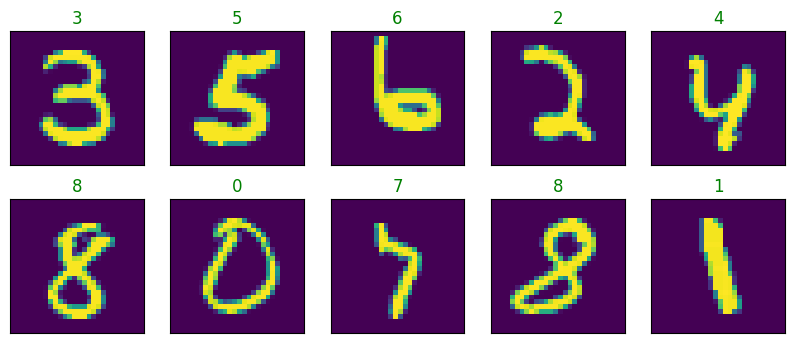

In [25]:
def test_images(n=10):
    index = np.random.randint(low=0, high=5000, size=n)
    fig = plt.figure(figsize=(n, 4))
    for i in range(n):
        [pred] = model.predict(x_test_[index[i]].reshape(1, 28, 28, 1))
        pred = np.argmax(pred)
        actual = np.argmax(y_test_[index[i]])
        fig.add_subplot(2, n//2, i + 1)
        plt.xticks([])
        plt.yticks([])
        if actual == pred:
            plt.title(pred, color='green')
        else:
            plt.title(pred, color='red')
        plt.imshow(x_test_[index[i]].reshape(28, 28))
test_images(10)

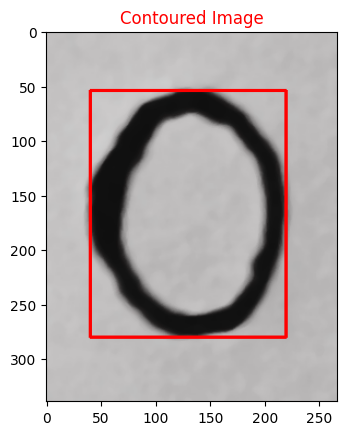

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The Recognized Numbers are: 0


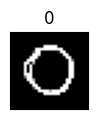

In [83]:
import cv2

def number_recognize(filepath):
    image = cv2.imread(filepath)
    image = cv2.medianBlur(image, 7)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 33, 25)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)
        digit = thresh[y:y + h, x:x + w]
        resized_digit = cv2.resize(digit, (18, 18))
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
        preprocessed_digits.append(padded_digit)

    plt.imshow(image, cmap="gray")
    plt.title("Contoured Image", color='red')
    plt.show()

    inp = np.array(preprocessed_digits)
    figr = plt.figure(figsize=(len(inp), 4))
    nums = []
    for i, digit in enumerate(preprocessed_digits):
        [prediction] = loaded_model.predict(digit.reshape(1, 28, 28, 1) / 255.)
        pred = np.argmax(prediction)
        nums.append(pred)
        figr.add_subplot(1, len(inp), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred)
    print("The Recognized Numbers are:", *nums)

number_recognize('0.jpg')


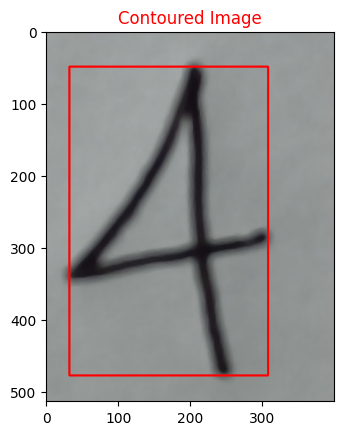

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The Recognized Numbers are: 4


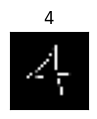

In [87]:
number_recognize('4.jpg')

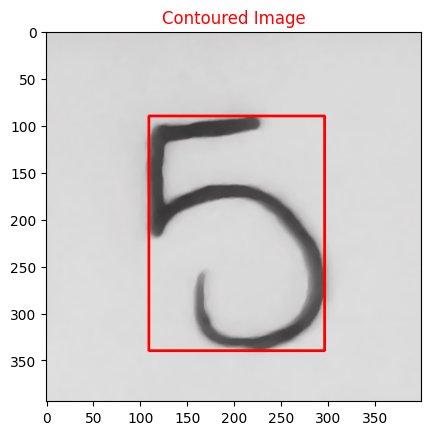

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Recognized Numbers are: 5


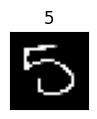

In [88]:
number_recognize('5.jpg')

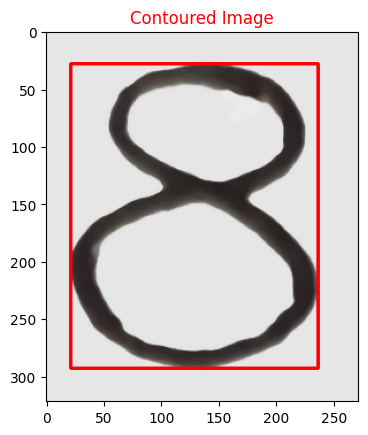

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Recognized Numbers are: 8


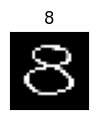

In [91]:
number_recognize('8.jpg')

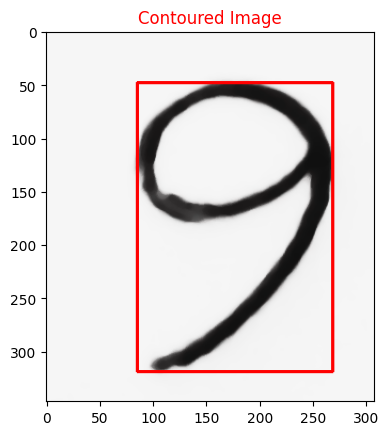

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Recognized Numbers are: 9


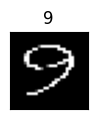

In [92]:
number_recognize('9.jpg')